In [106]:
import geopandas as gpd 
import osmnx 
import contextily as cx 
import matplotlib.pyplot as plt 
import pandas as pd 

In [107]:
#For printing all columns
pd.set_option('display.max_columns', None)

osmnx.config(
    overpass_settings='[out:json][timeout:90][date:"2020-09-07T00:00:00Z"]'
)

In [108]:
#LIST OF AMENITIES!!!: https://wiki.openstreetmap.org/wiki/Key:amenity

#Central Copenhagen (from OSMnx)
#pois = osmnx.geometries_from_point((55.6867243, 12.5700724), tags = {"amenity": True})

#Nørrebros Runddel with 2500 m distance
pois = osmnx.geometries_from_point((55.6935280, 12.5489348), tags = {"amenity": True}, dist=2500)

In [95]:
pois.head()

,unique_id,osmid,element_type,amenity,collection_times,operator,operator:website,operator:wikidata,operator:wikipedia,postal_code,geometry,website,smoking,phone,opening_hours,name,created_by,wikipedia,wikidata,cuisine,fvst:navnelbnr,microbrewery,wheelchair,wheelchair:description,opening_hours:url,note,toilets:wheelchair,brand:wikipedia,brand,brand:wikidata,fuel:octane_95,fuel:octane_92,fuel:diesel,payment:cards,fuel:octane_100,access,fee,parking,fvst:name,takeaway,branch,source,name:en,internet_access:fee,internet_access,ref:isil,alt_name,toilets,outdoor_seating,payment:credit_cards,addr:city,addr:housenumber,addr:postcode,addr:street,opening_hours:kitchen,diet:vegetarian,cost:coffee,diet:vegan,email,facebook,payment:bitcoin,opening_hours:cafe,old_name,description,fvst:fixme,name:es,reservation,dinner,lunch,capacity,award:michelin,contact:instagram,url,price,contact:email,alt_name:es,tourism,happycow:id,breakfast,delivery,atm,dispensing,religion,contact:website,shop,recycling_type,recycling:glass_bottles,recycling:glass,int_name,covered,bicycle_parking,public_transport,ferry,line,target,country,diplomatic,embassy,office,changing_table,contact:phone,opening_hours:seating,entrance,name:fr,stars,brewery,min_age,changing_table:location,diaper:unisex,baby_feeding,highchair,wheelchair:laundry,toilets:disposal,indoor,fee:price,drinking_water,payment:visa:contactless,free_refill,level,payment:visa,collection_times:signed,valves,fixme,books,second_hand,male,comment,drive_through,ref,name:da,twitter,publishing,start_date,type,backrest,layer,vending,drink:cocktail,self_service,kayak_rental,sport,telephone,check_date,recycling:plastic,recycling:plastic_bottles,recycling:plastic_packaging,recycling:batteries,recycling:books,recycling:cans,recycling:cardboard,recycling:cartons,recycling:clothes,recycling:electrical_appliances,recycling:green_waste,recycling:magazines,recycling:newspaper,recycling:paper,recycling:paper_packaging,recycling:scrap_metal,recycling:small_appliances,recycling:waste,recycling:wood,female,toilets:position,name:de,cemetery,barrier,year,maxstay,noexit,access:disabled,date,display,man_made,monitoring:bicycle,recording,support,thermometer,visibility,surveillance,healthcare,colour,material,seats,fuel,currency:DKK,food,internet_access:ssid,bicycle,fax,internet_access_2,source:date,phone_1,yelp,age_limit,emergency,contact:facebook,contact:foursquare,car,motorcar,name:pt,maxheight,healthcare:speciality,brothel:club,opening_hours:bar,service:bicycle:chain_tool,service:bicycle:pump,addr:country,addr:municipality,social_facility,social_facility:for,short_name,name:kl,unisex,cash_in,language:da,owner,natural,website:menu,name:fo,club,toilets:access,name:fi,diet:meat,payment:visa_electron,payment:mastercard,payment:maestro,payment:discover_card,payment:diners_club,payment:american_express,payment:contactless,payment:debit_cards,drink:beer,drink:wine,fvst:navnelbnr_1,payment:credit_card,artist_name,wikimedia_commons,pitch,apartments,floor_area,socket:type2,cocktails,alcohol:cocktail,drink:alcohol,official_name,opening_hours:covid19,payment:cash,gay:men,craft,location,museum,gender_segregated,supervised,underground,payment:ParkMan,payment:coins,mapillary,currency:EUR,operator:en,theatre:genre,post_office:type,addr:unit,guide,motor_vehicle,recycling:shoes,studio,car_wash,denomination,name:zh,service_times,diet:organic,drink:spritz,bar,surface,lit,waste,operator:type,recycling:refund_bottles,diet:gluten_free,model,bench,manometer,screen,voltage,amperage,image,payment:android_pay,payment:apple_pay,payment:card,payment:gift_card,ref:vatin,nodes,building,building:colour,height,building:levels,historic,name:eo,name:it,name:ko,name:no,name:pl,name:ru,name:sv,theatre:type,building:architecture,building:material,roof:colour,roof:material,architect,architect:wikidata,name:ar,name:bn,name:ca,name:cs,name:el,name:et,name:fa,name:gl,name:hu,name:is,name:ja,name:la,name:lt,name:nl,name:th,name:vi,service_language,smoking:outside,old_name:de,roo

<AxesSubplot:>

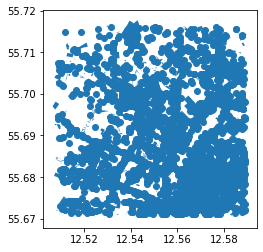

In [96]:
pois.plot()

In [97]:
#Find all types of amenities
pois["amenity"].unique()

array(['post_box', 'pub', 'post_office', 'restaurant', 'cinema', 'bar',
       'fuel', 'parking', 'atm', 'bench', 'nightclub', 'school',
       'college', 'fast_food', 'library', 'cafe', 'theatre', 'bank',
       'veterinary', 'bicycle_parking', 'drinking_water', 'pharmacy',
       'place_of_worship', 'bureau_de_change', 'car_rental', 'toilets',
       'internet_cafe', 'courthouse', 'recycling', 'university',
       'bicycle_rental', 'flowers', 'ferry_terminal', 'embassy',
       'events_venue', 'stripclub', 'police', 'kindergarten', 'photo',
       'compressed_air', 'fountain', 'ice_cream', 'taxi', 'arts_centre',
       'parking_entrance', 'fire_station', 'publisher', 'vending_machine',
       'boat_rental', 'climbing_wall', 'hospital', 'bbq', 'waste_basket',
       'clock', 'car_wash', 'dentist', 'community_centre', 'user_defined',
       'childcare', 'clinic', 'dancing_school', 'coworking_space',
       'charging_station', 'brothel', 'doctors', 'bicycle_repair_station',
       'soci

In [98]:
#Drop the amenities that are not useful in our case
values = ["post_box", "parking", "college","drinking_water", "library", "bank", "fuel", "university", "bench", 
          "bicycle_parking", "recycling", "embassy", "toilets", "school", "stripclub", "pharmacy", "taxi", "atm", 
          "fire_station", "publisher", "bureau_de_change", "vending_machine", "waste_basket","clock", "car_rental", 
          "parking_entrance", "clinic", "charging_station", "kindergarten", "post_office", "hookah_lounge", "community_centre",
          "social_facility", "prison", "kitchen", "dentist", "games", "coworking_space","compressed_air", "social_centre", 
          "hospital", "student_accommodation", "bik", "nursing_home", "car_wash", "veterinary", "bbq","doctors", "brothel", 
          "internet_cafe","driving_school", "childcare", "waste_disposal", "conference_centre", "courthouse", "ferry_terminal",
          "police", "photo", "user_defined", "dancing_school","bicycle_repair_station", "parliament", "monastery","dojo",
          "studio",  "electrical", "warehouse", "casino","fitness_centre", "coming_cafe", "grave_yard", "swimming_pool", 
          "public_building", "parking_space", "vehicle_inspection", "boat_storage", "motorcycle_parking", "festival_grounds",
          "shelter", "yes", "townhall"]

#drop rows that contain any value in the list
pois = pois[pois.amenity.isin(values) == False]

In [99]:
pois.head()

,unique_id,osmid,element_type,amenity,collection_times,operator,operator:website,operator:wikidata,operator:wikipedia,postal_code,geometry,website,smoking,phone,opening_hours,name,created_by,wikipedia,wikidata,cuisine,fvst:navnelbnr,microbrewery,wheelchair,wheelchair:description,opening_hours:url,note,toilets:wheelchair,brand:wikipedia,brand,brand:wikidata,fuel:octane_95,fuel:octane_92,fuel:diesel,payment:cards,fuel:octane_100,access,fee,parking,fvst:name,takeaway,branch,source,name:en,internet_access:fee,internet_access,ref:isil,alt_name,toilets,outdoor_seating,payment:credit_cards,addr:city,addr:housenumber,addr:postcode,addr:street,opening_hours:kitchen,diet:vegetarian,cost:coffee,diet:vegan,email,facebook,payment:bitcoin,opening_hours:cafe,old_name,description,fvst:fixme,name:es,reservation,dinner,lunch,capacity,award:michelin,contact:instagram,url,price,contact:email,alt_name:es,tourism,happycow:id,breakfast,delivery,atm,dispensing,religion,contact:website,shop,recycling_type,recycling:glass_bottles,recycling:glass,int_name,covered,bicycle_parking,public_transport,ferry,line,target,country,diplomatic,embassy,office,changing_table,contact:phone,opening_hours:seating,entrance,name:fr,stars,brewery,min_age,changing_table:location,diaper:unisex,baby_feeding,highchair,wheelchair:laundry,toilets:disposal,indoor,fee:price,drinking_water,payment:visa:contactless,free_refill,level,payment:visa,collection_times:signed,valves,fixme,books,second_hand,male,comment,drive_through,ref,name:da,twitter,publishing,start_date,type,backrest,layer,vending,drink:cocktail,self_service,kayak_rental,sport,telephone,check_date,recycling:plastic,recycling:plastic_bottles,recycling:plastic_packaging,recycling:batteries,recycling:books,recycling:cans,recycling:cardboard,recycling:cartons,recycling:clothes,recycling:electrical_appliances,recycling:green_waste,recycling:magazines,recycling:newspaper,recycling:paper,recycling:paper_packaging,recycling:scrap_metal,recycling:small_appliances,recycling:waste,recycling:wood,female,toilets:position,name:de,cemetery,barrier,year,maxstay,noexit,access:disabled,date,display,man_made,monitoring:bicycle,recording,support,thermometer,visibility,surveillance,healthcare,colour,material,seats,fuel,currency:DKK,food,internet_access:ssid,bicycle,fax,internet_access_2,source:date,phone_1,yelp,age_limit,emergency,contact:facebook,contact:foursquare,car,motorcar,name:pt,maxheight,healthcare:speciality,brothel:club,opening_hours:bar,service:bicycle:chain_tool,service:bicycle:pump,addr:country,addr:municipality,social_facility,social_facility:for,short_name,name:kl,unisex,cash_in,language:da,owner,natural,website:menu,name:fo,club,toilets:access,name:fi,diet:meat,payment:visa_electron,payment:mastercard,payment:maestro,payment:discover_card,payment:diners_club,payment:american_express,payment:contactless,payment:debit_cards,drink:beer,drink:wine,fvst:navnelbnr_1,payment:credit_card,artist_name,wikimedia_commons,pitch,apartments,floor_area,socket:type2,cocktails,alcohol:cocktail,drink:alcohol,official_name,opening_hours:covid19,payment:cash,gay:men,craft,location,museum,gender_segregated,supervised,underground,payment:ParkMan,payment:coins,mapillary,currency:EUR,operator:en,theatre:genre,post_office:type,addr:unit,guide,motor_vehicle,recycling:shoes,studio,car_wash,denomination,name:zh,service_times,diet:organic,drink:spritz,bar,surface,lit,waste,operator:type,recycling:refund_bottles,diet:gluten_free,model,bench,manometer,screen,voltage,amperage,image,payment:android_pay,payment:apple_pay,payment:card,payment:gift_card,ref:vatin,nodes,building,building:colour,height,building:levels,historic,name:eo,name:it,name:ko,name:no,name:pl,name:ru,name:sv,theatre:type,building:architecture,building:material,roof:colour,roof:material,architect,architect:wikidata,name:ar,name:bn,name:ca,name:cs,name:el,name:et,name:fa,name:gl,name:hu,name:is,name:ja,name:la,name:lt,name:nl,name:th,name:vi,service_language,smoking:outside,old_name:de,roo

In [100]:
#Check for columns only containing nan and drop these
for i in pois.columns:
    print("column", i, pois[i].isnull().values.all())
    if pois[i].isnull().values.all() == True:
        pois = pois.drop(i, axis=1)


column unique_id False
column osmid False
column element_type False
column amenity False
column collection_times True
column operator False
column operator:website True
column operator:wikidata True
column operator:wikipedia True
column postal_code True
column geometry False
column website False
column smoking False
column phone False
column opening_hours False
column name False
column created_by False
column wikipedia False
column wikidata False
column cuisine False
column fvst:navnelbnr False
column microbrewery False
column wheelchair False
column wheelchair:description False
column opening_hours:url False
column note False
column toilets:wheelchair False
column brand:wikipedia False
column brand False
column brand:wikidata False
column fuel:octane_95 True
column fuel:octane_92 True
column fuel:diesel True
column payment:cards True
column fuel:octane_100 True
column access False
column fee True
column parking True
column fvst:name False
column takeaway False
column branch False
colu

<AxesSubplot:>

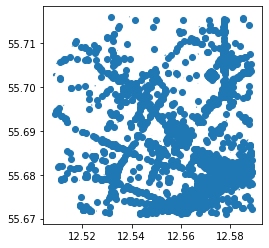

In [102]:
pois.plot()

In [103]:
pois["amenity"].unique()

array(['pub', 'restaurant', 'cinema', 'bar', 'nightclub', 'fast_food',
       'cafe', 'theatre', 'place_of_worship', 'bicycle_rental', 'flowers',
       'events_venue', 'fountain', 'ice_cream', 'arts_centre',
       'boat_rental', 'climbing_wall', 'club', 'deli', 'wine',
       'marketplace', 'planetarium', 'music_venue'], dtype=object)

In [104]:
pois["amenity"].value_counts()

fast_food           857
cafe                501
restaurant          485
bar                 240
pub                 113
place_of_worship     80
fountain             58
bicycle_rental       33
ice_cream            28
theatre              26
nightclub            22
events_venue         16
cinema               11
club                  5
arts_centre           5
deli                  2
planetarium           1
boat_rental           1
climbing_wall         1
flowers               1
wine                  1
marketplace           1
music_venue           1
Name: amenity, dtype: int64

In [105]:
#Dropping rows that do not have a name
pois=pois.dropna(subset=['name'])


In [71]:
pois

,unique_id,osmid,element_type,amenity,operator,geometry,website,smoking,phone,opening_hours,name,wikipedia,wikidata,cuisine,fvst:navnelbnr,microbrewery,wheelchair,wheelchair:description,access,addr:city,addr:housenumber,addr:postcode,addr:street,diet:vegetarian,opening_hours:kitchen,outdoor_seating,source,fvst:name,internet_access,price,alt_name,contact:email,capacity,internet_access:fee,covered,award:michelin,email,reservation,stars,diet:vegan,brewery,min_age,note,toilets:wheelchair,changing_table:location,diaper:unisex,baby_feeding,changing_table,contact:website,highchair,shop,wheelchair:laundry,old_name,takeaway,drive_through,ref,facebook,twitter,branch,sport,tourism,happycow:id,telephone,delivery,food,internet_access:ssid,religion,name:es,fvst:fixme,name:en,social_facility,description,payment:credit_card,alcohol:cocktail,office,craft,toilets:access,toilets,comment,diet:organic,opening_hours:covid19,bar,diet:gluten_free,drink:wine,nodes,building,url,denomination,name:da,capacity:deaf,building:part,building:levels,start_date,artist_name
1,node/24958713,24958713,node,pub,NaN,POINT (12.55783 55.68929),http://oelbaren.dk/,no,+45 35354534,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",Ølbaren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/24971137,24971137,node,restaurant,NaN,POINT (12.56391 55.69022),https://noerrebrobryghus.dk/,NaN,+45 35300530,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",Nørrebro Bryghus Restaurant,da:Nørrebro Bryghus,Q7071526,regional,114128,yes,yes,Adgang via elevator gennem port. Ingen armstøt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/25440190,25440190,node,cinema,NaN,POINT (12.55582 55.69195),https://www.empirebio.dk/,NaN,+45 35360036,12:00-22:30,Empire Bio,da:Empire Bio,Q22582793,NaN,NaN,NaN,limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/25904721,25904721,node,pub,NaN,POINT (12.54671 55.69961),http://www.cafeviking.dk,NaN,+45 35831493,"Mo-Sa 09:00-02:00, Su 09:00-20:00",Café Viking,NaN,NaN,NaN,109922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,node/279143638,279143638,node,restaurant,NaN,POINT (12.53765 55.68564),http://www.viet-namnam.dk/,NaN,NaN,16:00-23:00,Viet Nam Nam,NaN,NaN,north_vietnamese,115050,NaN,no,NaN,NaN,Frederiksberg,8,2000,Godthåbsvej,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.